In [269]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['e']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [270]:
x = linspace(0,1,100) # evaluation points
n = 5 # degree
X = linspace(0,1,n+1) # interpolation points

In [271]:
# define lagrange basis

def lagrange(x,i,X):
  l = x*0+1
  for j in range(len(X)):
    if i != j:
      l = l*(x-X[j])/(X[i]-X[j])
  return l

def lagrange_slow(x,i,X):
  return prod([(x-X[j])/(X[i]-X[j]) for j in range(len(X)) if i!=j],axis=0)

In [272]:
import time
start = time.time() #starter time
l0 = lagrange(x,0,X)
stop = time.time() #final time

print('Time lagrange: ',stop-start)

start1 = time.time()
l0_slow = lagrange_slow(x,0,X)
stop1 = time.time()

print('Time lagrange slow: ',stop1-start1)

Time lagrange:  0.0001938343048095703
Time lagrange slow:  0.00020837783813476562


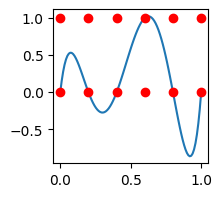

In [273]:
l0 = lagrange(x,3,X)
figsize(2,2)
plot(x,l0)
plot(X,X*0, 'ro')
plot(X,X*0+1,'ro')

In [274]:
# create the matrix V
#V = zeros((len(x),len(X)))
#for i in range(len(X)):
#  V[:,i] = lagrange(x,i,X)
V = array([lagrange(x,i,X) for i in range(len(X))]).T

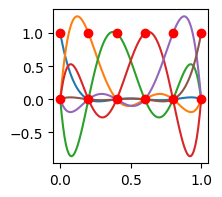

In [275]:
# plot lagrange basis
plot(x,V)
plot(X,X*0, 'ro')
plot(X,X*0+1,'ro')

In [276]:
def runge(x):
  return 1/(1+100*(x-0.5)**2)

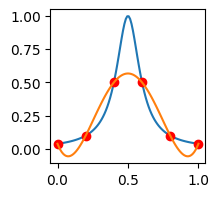

In [277]:
plot(x,runge(x))
plot(X,runge(X),'ro')
plot(x,V.dot(runge(X))) #Vp=u

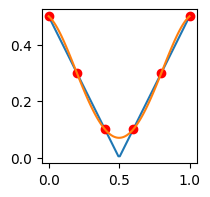

In [278]:
def abs_value(x):
  return abs(x-0.5)
plot(x,abs_value(x))
plot(X,abs_value(X),'ro')
plot(x,V.dot(abs_value(X))) #Vp=u

Text(0.5, 1.0, 'Lebesgue function with equispaced nodes')

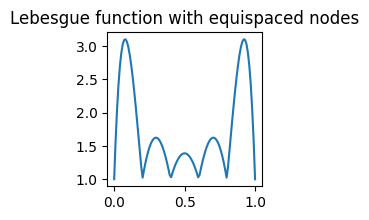

In [279]:
# lebesgue function
lebesgue = sum(abs(V),axis=1)
plot(x,lebesgue)
title('Lebesgue function with equispaced nodes')

In [280]:
def chebyshev_nodes(n,a=0,b=1):
  i = array(range(n))
  x = cos((2*i+1)*pi/(2*n)) #nodes on [-1,1]
  return 0.5*(b-a)*x + 0.5*(b+a) # nodes on [a,b]

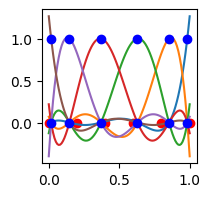

In [281]:
plot(X,X*0,'ro')
X = chebyshev_nodes(n+1)
V = array([lagrange(x,i,X) for i in range(len(X))]).T
plot(x,V)
plot(X,X*0,'bo')
plot(X,X*0+1,'bo')

Text(0.5, 1.0, 'Lebesgue function with Chebishev nodes')

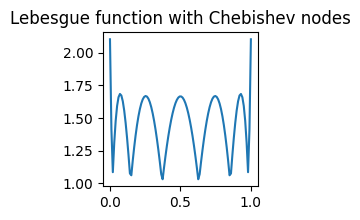

In [282]:
lebesgue = sum(abs(V),axis=1)
plot(x,lebesgue)
title('Lebesgue function with Chebishev nodes')

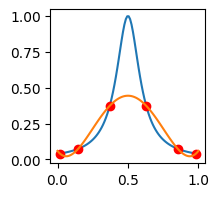

In [283]:
plot(x,runge(x))
plot(X,runge(X),'ro')
plot(x,V.dot(runge(X))) #Vp=u

In [284]:
def compute_error(x,u,range_of_n):
  error = []
  lebesgue = []
  for n in range_of_n:
    X = chebyshev_nodes(n+1)
    #X = linspace(0,1,n+1) # put this to have equispaced points
    V = array([lagrange(x,i,X) for i in range(len(X))]).T
    lebesgue_norm = max(sum(abs(V),axis=1))
    error_u = u(x)-V.dot(u(X))
    error_norm = max(abs(error_u))
    error.append(error_norm)
    lebesgue.append(lebesgue_norm)
  return error, lebesgue

In [285]:
N = range(3,125)
e, l = compute_error(x,runge,N)

Text(0, 0.5, 'Error')

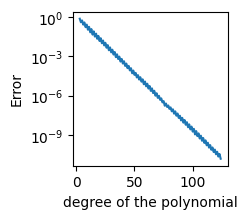

In [286]:
plot(N,e)
yscale('log')
xlabel('degree of the polynomial')
ylabel('Error')

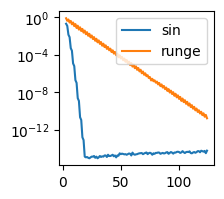

In [287]:
def seno(x):
  return sin(2*pi*x)
esin, lsin = compute_error(x,seno,N)
plot(N,esin,label='sin')
plot(N,e,label='runge')
legend()
yscale('log')

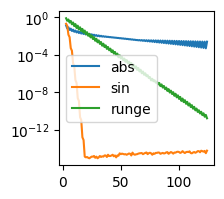

In [288]:
def abs_value(x):
  return abs(x-0.5)
eabs, labs = compute_error(x,abs_value,N)
plot(N,eabs,label='abs')
plot(N,esin,label='sin')
plot(N,e,label='runge')
legend()
yscale('log')

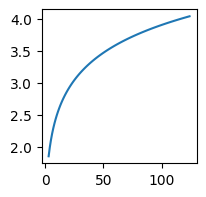

In [289]:
plot(N,labs) # lebesgue function

In [290]:
import scipy
from scipy.special import binom

In [291]:
def bernstain(x,i,n):
  return binom(n, i) * x**i * (1-x)**(n-i)

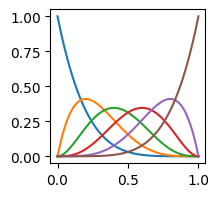

In [292]:
for i in range(n+1):
  plot(x,bernstain(x,i,n)) #bernstain basis

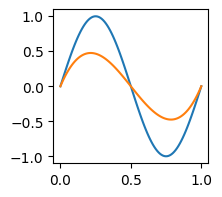

In [293]:
V = array([bernstain(x,i,n) for i in range(n+1)]).T
X = linspace(0,1,n+1)
plot(x,seno(x))
plot(x, V.dot(seno(X)))

In [294]:
def bernstain_approx(x,u,n):
  V = array([bernstain(x,i,n) for i in range(n+1)]).T
  X = linspace(0,1,n+1)
  return V.dot(u(X))

[[<matplotlib.lines.Line2D at 0x784d02267580>],

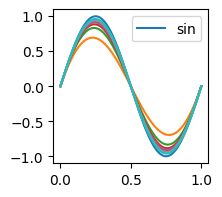

In [295]:
plot(x,seno(x),label='sin')
legend()
[plot(x,bernstain_approx(x,seno,i))for i in range(10,100,10)]

[[<matplotlib.lines.Line2D at 0x784d022eb3d0>],

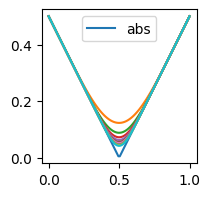

In [296]:
plot(x,abs_value(x),label='abs')
legend()
[plot(x,bernstain_approx(x,abs_value,i))for i in range(10,100,10)]

[[<matplotlib.lines.Line2D at 0x784d02171b10>],

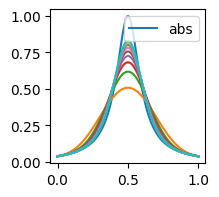

In [297]:
plot(x,runge(x),label='abs')
legend()
[plot(x,bernstain_approx(x,runge,i))for i in range(10,100,10)]

In [298]:
def compute_error(x,u,range_of_n):
  error = []
  for n in range_of_n:
    X = linspace(0,1,n+1)
    V = array([bernstain(x,i,n) for i in range(n+1)]).T
    error_u = u(x)-V.dot(u(X))
    error_norm = max(abs(error_u))
    error.append(error_norm)
  return error

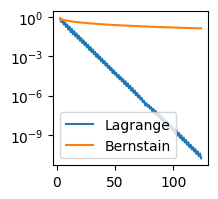

In [301]:
# Bernstain slow convergence
N = range(3,125)
e_ = compute_error(x,runge,N)
esin_ = compute_error(x,seno,N)
eabs_ = compute_error(x,abs_value,N)
plot(N,e, label='Lagrange')
plot(N,e_, label = 'Bernstain')
legend()
yscale('log')